In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000


In [13]:
data['sum'] = 1
data.metroscubiertos.describe()

count    222600.000000
mean        174.016774
std          98.152950
min          15.000000
25%          90.000000
50%         153.000000
75%         240.000000
max         439.000000
Name: metroscubiertos, dtype: float64

In [11]:
data.dropna(subset={'metroscubiertos'},inplace=True)
data.metrostotales.fillna(value=data.metroscubiertos,inplace=True)
data.metrostotales.describe()

count    222600.000000
mean        170.600256
std          95.099205
min          15.000000
25%          96.000000
50%         147.000000
75%         227.000000
max         439.000000
Name: metrostotales, dtype: float64

In [21]:
data.loc[data.metrostotales>350, 'rango_superficie'] = '+350'
data.loc[((data.metrostotales>300) & (data.metrostotales<351)), 'rango_superficie'] = '300-350'
data.loc[((data.metrostotales>250) & (data.metrostotales<301)), 'rango_superficie'] = '250-300'
data.loc[((data.metrostotales>200) & (data.metrostotales<251)), 'rango_superficie'] = '200-250'
data.loc[((data.metrostotales>150) & (data.metrostotales<201)), 'rango_superficie'] = '150-200'
data.loc[((data.metrostotales>100) & (data.metrostotales<151)), 'rango_superficie'] = '100-150'
data.loc[((data.metrostotales>50) & (data.metrostotales<101)), 'rango_superficie'] = '50-100'
data.loc[data.metrostotales<50, 'rango_superficie'] = '-50'

In [22]:
data.loc[data.precio>10000000, 'rango_precio'] = '+10000000'
data.loc[((data.precio>9000000) & (data.precio<10000001)), 'rango_precio'] = '9000000-10000000'
data.loc[((data.precio>8000000) & (data.precio<9000001)), 'rango_precio'] = '8000000-9000000'
data.loc[((data.precio>7000000) & (data.precio<8000001)), 'rango_precio'] = '7000000-8000000'
data.loc[((data.precio>6000000) & (data.precio<7000001)), 'rango_precio'] = '6000000-7000000'
data.loc[((data.precio>5000000) & (data.precio<6000001)), 'rango_precio'] = '5000000-6000000'
data.loc[((data.precio>4000000) & (data.precio<5000001)), 'rango_precio'] = '4000000-5000000'
data.loc[((data.precio>3000000) & (data.precio<4000001)), 'rango_precio'] = '3000000-4000000'
data.loc[((data.precio>2000000) & (data.precio<3000001)), 'rango_precio'] = '2000000-3000000'
data.loc[((data.precio>1000000) & (data.precio<2000001)), 'rango_precio'] = '1000000-2000000'
data.loc[((data.precio<1000001)), 'rango_precio'] = '-1000000'

In [44]:
rgsup_vs_rgprecio = data.groupby(['rango_superficie','rango_precio']).agg({'sum':'sum'}).unstack()

In [45]:
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
rgsup_vs_rgprecio = rgsup_vs_rgprecio.reindex(new_idx)
#new_idx2 = ['-1000000','1000000-2000000','2000000-3000000','3000000-4000000','4000000-5000000','5000000-6000000','6000000-7000000','7000000-8000000','8000000-9000000','9000000-10000000','+10000000']
#rgsup_vs_rgprecio = rgsup_vs_rgprecio.reindex(new_idx2, axis='columns')
rgsup_vs_rgprecio = rgsup_vs_rgprecio.applymap(lambda x: np.log(x))

Text(69.0, 0.5, 'Rango de superficie')

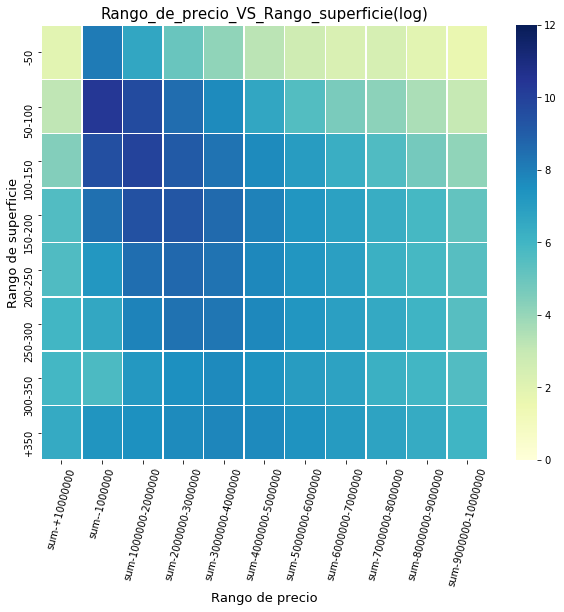

In [46]:
plt.figure(figsize=(10,8))
g = sns.heatmap(rgsup_vs_rgprecio, vmin = 0, vmax=12, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Rango_de_precio_VS_Rango_superficie(log)", fontsize=15)
g.set_xlabel("Rango de precio", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)

In [29]:
ciudades = (data.ciudad.value_counts()>2500)
ciudades = (ciudades[ciudades==True]).index

data_ciudad = data.loc[data.ciudad.isin(ciudades)]
sup_vs_ciudad = data_ciudad.groupby(['rango_superficie','ciudad']).agg({'sum':'sum'}).unstack()

In [30]:
sup_vs_ciudad = sup_vs_ciudad.applymap(lambda x: np.log(x))

Text(69.0, 0.5, 'Rango de superficie')

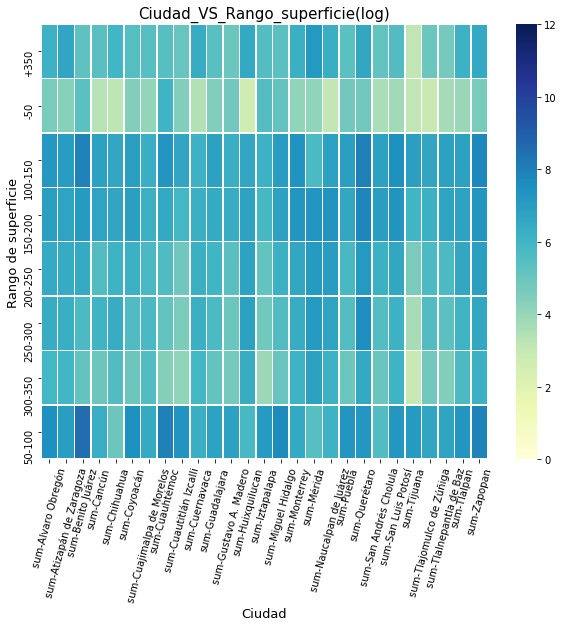

In [47]:
plt.figure(figsize=(10,8))
g = sns.heatmap(sup_vs_ciudad, vmin = 0, vmax=12, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Ciudad_VS_Rango_superficie(log)", fontsize=15)
g.set_xlabel("Ciudad", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)

Text(0, 0.5, 'Cantidad de propiedades publicadas')

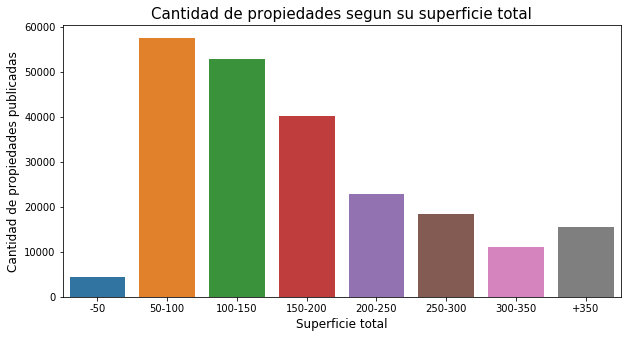

In [59]:
sup = data.groupby('rango_superficie').agg({'sum':'sum'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
sup = sup.reindex(new_idx)
sup.reset_index(inplace=True)
plt.figure(figsize = (10,5))
g = sns.barplot(x = sup['rango_superficie'], y= sup['sum']) 
g.set_title("Cantidad de propiedades segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Cantidad de propiedades publicadas", fontsize=12)